In [1]:
from MulticriteriaEnsemble import MulticriteriaEnsemble
from tools import dataset
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score,hamming_loss,cohen_kappa_score,jaccard_similarity_score,matthews_corrcoef
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib
import pandas as pd
import numpy as np
from sklearn.externals import joblib
import os
from tools import dataset
import copy
from mauc_gini import*
matplotlib.rcParams['figure.figsize']=[1,1]
%matplotlib inline
metrics = {
    'Accuracy':[make_scorer(accuracy_score),-0.0000000001,1.000000001],
    'Precision(Macro)':[make_scorer(precision_score,average='macro'),-0.0000000001,1.000000001],
    'Recall(Macro)':[make_scorer(recall_score,average='macro'),-0.0000000001,1.000000001],
    'F1':[make_scorer(f1_score,average='macro'),-0.0000000001,1.000000001],
    'Hamming Loss':[make_scorer(hamming_loss,greater_is_better=False),1.000000001,-0.0000000001],
    'Cohen Kappa':[make_scorer(cohen_kappa_score),-0.0000000001,1.000000001],
    'MCC':[make_scorer(matthews_corrcoef),-0.0000000001,1.000000001],
}

In [2]:
statlog_satimage = dataset(path='./datasets/statlog_satimage/',name='statlog_satimage')
statlog_satimage.feat_class_split()
dataset=copy.deepcopy(statlog_satimage)

In [3]:
classes = dataset.y_train.append(dataset.y_test).unique()
num_classes = len(classes)
global_metric = make_scorer(MultiClassNormalizedGini,needs_proba=True,num_classes=num_classes,dt_labels=classes)

In [4]:
me = MulticriteriaEnsemble(dataset=dataset,crit_metrics=metrics,global_metric=global_metric,a=5,delta=0.14285714285714285714285714285714,epsilon=0.0000001,jenks=False,voting='soft')

In [5]:
me.fit(mtable=True)

Multicriteria table formed!!!


<h3> Multicriteria Table </h3>

In [6]:
me.multicriteria_table.sort_values('Ranking')
me.multicriteria_table.to_csv(dataset.path+'results/multicriteria_table.csv')

<h3> Meta Table </h3>

In [7]:
me.meta_table
me.meta_table.to_csv(dataset.path+'results/meta_table.csv')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - No Jenks</h3>

In [8]:
me.score()

0.9763203407642582

<h3>Multicriteria Ensemble(Utility) Model Weights</h3> 

In [9]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_no_jenks.csv')
print df

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.000762
Decision_Tree_statlog_satimage_FOLD4  0.034579
SVM_statlog_satimage_FOLD2            0.065583
KNN_statlog_satimage_FOLD2            0.062875
SVM_statlog_satimage_FOLD1            0.064237
GaussianNB_statlog_satimage_FOLD0     0.002624
GaussianNB_statlog_satimage_FOLD4     0.001816
SVM_statlog_satimage_FOLD3            0.061578
GaussianNB_statlog_satimage_FOLD2     0.001965
GaussianNB_statlog_satimage_FOLD1     0.002035
SVM_statlog_satimage_FOLD0            0.061288
SVM_statlog_satimage_FOLD4            0.065324
MLP_statlog_satimage_FOLD0            0.020449
MLP_statlog_satimage_FOLD1            0.019403
MLP_statlog_satimage_FOLD2            0.022636
MLP_statlog_satimage_FOLD3            0.023149
MLP_statlog_satimage_FOLD4            0.018428
Decision_Tree_statlog_satimage_FOLD2  0.026360
KNN_statlog_satimage_FOLD3            0.063642
KNN_statlog_satimage_FOLD0            0.063645
Decision_Tree

<h3>Multicriteria Ensemble(Utility) Global Utilities</h3>

In [10]:
df = pd.DataFrame.from_dict(me.utastar_model.global_utilities_post,orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/global_utilities_post.csv')

<h3>Multicriteria Ensemble(Utility) Partial Utilities</h3>

In [11]:
me.utastar_model.marginal_post

OrderedDict([('F1', [0.0, 0.0, 0.0, 0.0, 7.3840545167561841e-08]),
             ('MCC', [0.0, 0.0, 0.0, 0.0, 0.99999186660915529]),
             ('Cohen Kappa', [0.0, 0.0, 0.0, 0.0, 7.8468719176351594e-06]),
             ('Precision(Macro)', [0.0, 0.0, 0.0, 0.0, 1.175371665094916e-07]),
             ('Hamming Loss', [0.0, 0.0, 0.0, 0.0, 2.9072454689863618e-08]),
             ('Recall(Macro)', [0.0, 0.0, 0.0, 0.0, 3.699630608666196e-08]),
             ('Accuracy', [0.0, 0.0, 0.0, 0.0, 2.9072454689863634e-08])])

<h3>Multicriteria Ensemble(Utility) Criteria Weights</h3>

                        Weight
F1                7.384055e-08
MCC               9.999919e-01
Cohen Kappa       7.846872e-06
Precision(Macro)  1.175372e-07
Hamming Loss      2.907245e-08
Recall(Macro)     3.699631e-08
Accuracy          2.907245e-08
(7.8468719176351594e-06, 1e-05, 1.0000018666091552)
(1.175371665094916e-07, 1e-05, 1.0000018666091552)
(2.9072454689863618e-08, 1e-05, 1.0000018666091552)
(3.699630608666196e-08, 1e-05, 1.0000018666091552)
(2.9072454689863634e-08, 1e-05, 1.0000018666091552)


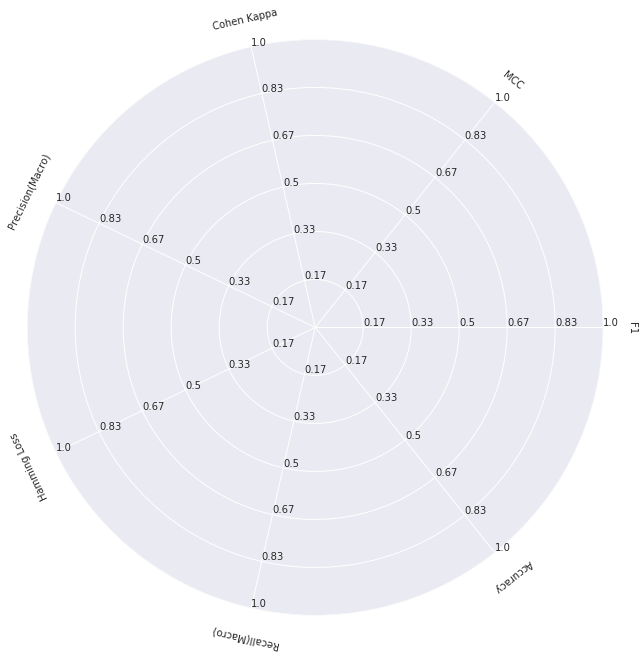

In [12]:
df = pd.DataFrame.from_dict(me.utastar_model.model_weights_post,orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/model_weights_post.csv')
print df
me.plot_criteria_weights()

<h3>Multicriteria Ensemble(Utility) Tau Kendall Post</h3>

In [13]:

%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10,10]
me.utastar_model.tau_post

0.54315340910983823

<h3> Global Utilities Chart </h3>

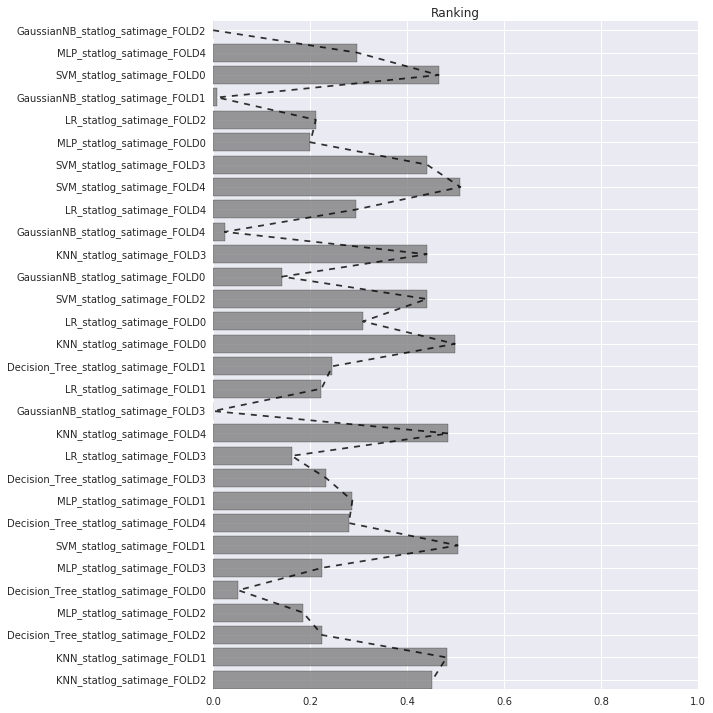

In [14]:
me.plot_global_utilities()

<h3>Predicted Global Utilities</h3>

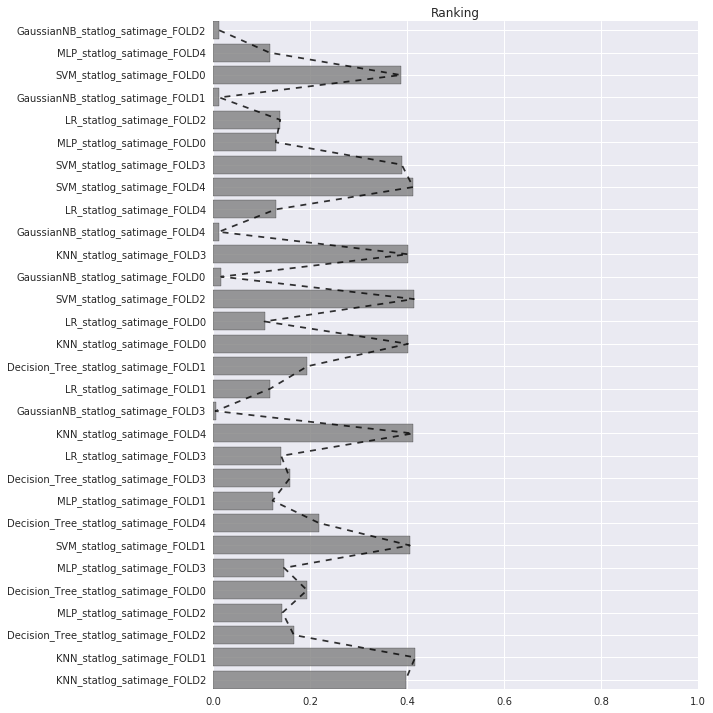

In [15]:
me.plot_global_utilities_pred()

<h3> Partial Utilities Chart </h3>

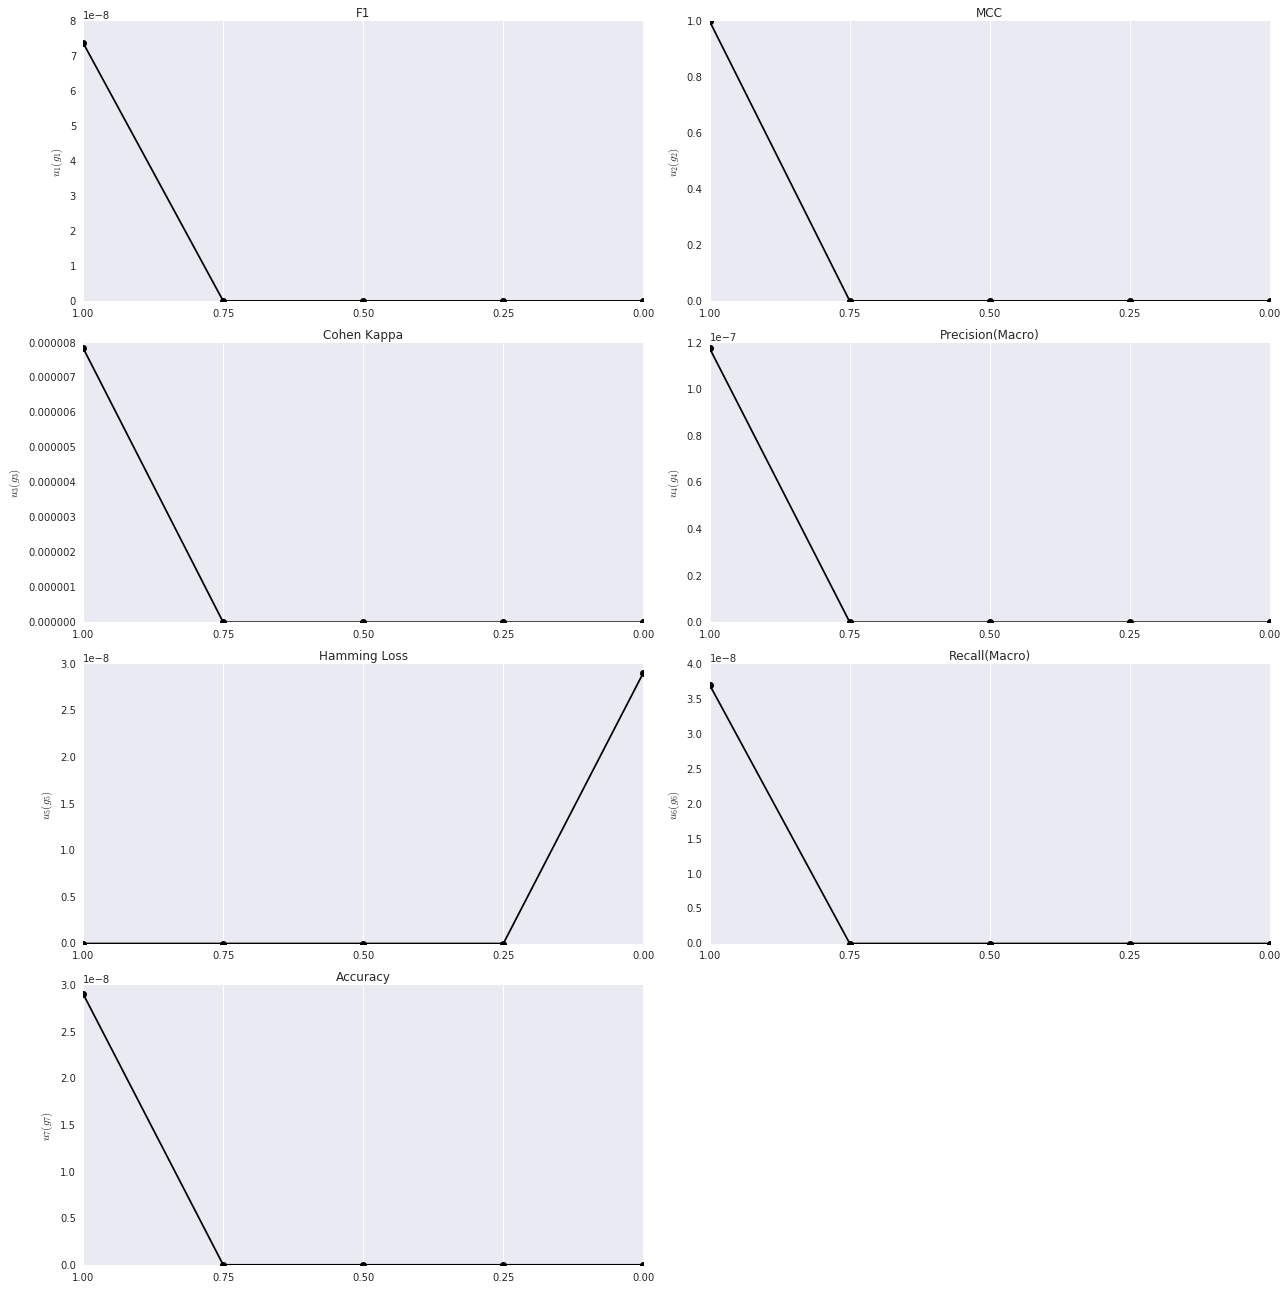

In [16]:
me.plot_partial_utilities()

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Normalized Gini Score on Test Set - No Jenks </h3>

In [17]:
import jenkspy
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
#natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
#metrics = [i if  i > natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9718912855182635

<h3> Weighted Majority Voting Ensemble (Normalized Gini) Model Weights - No Jenks </h3>

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.032771
Decision_Tree_statlog_satimage_FOLD4  0.032051
SVM_statlog_satimage_FOLD2            0.035016
KNN_statlog_satimage_FOLD2            0.034652
SVM_statlog_satimage_FOLD1            0.035035
GaussianNB_statlog_satimage_FOLD0     0.032789
GaussianNB_statlog_satimage_FOLD4     0.032755
SVM_statlog_satimage_FOLD3            0.035013
GaussianNB_statlog_satimage_FOLD2     0.032744
GaussianNB_statlog_satimage_FOLD1     0.032771
SVM_statlog_satimage_FOLD0            0.035047
SVM_statlog_satimage_FOLD4            0.035045
MLP_statlog_satimage_FOLD0            0.033707
MLP_statlog_satimage_FOLD1            0.033809
MLP_statlog_satimage_FOLD2            0.033643
MLP_statlog_satimage_FOLD3            0.033713
MLP_statlog_satimage_FOLD4            0.033675
Decision_Tree_statlog_satimage_FOLD2  0.031963
KNN_statlog_satimage_FOLD3            0.034679
KNN_statlog_satimage_FOLD0            0.034617
Decision_Tree

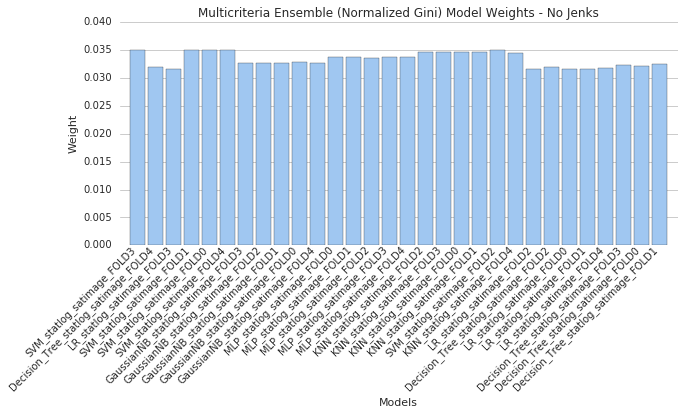

In [18]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_no_jenks.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble (Normalized Gini) Model Weights - No Jenks')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set - With Jenks (Default Cluster Limit = 2)</h3>

In [19]:
me.jenks=True
me.fit(mtable=False)
me.score()

0.9762410715955567

<h3>Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)</h3>

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.000000
Decision_Tree_statlog_satimage_FOLD4  0.051306
SVM_statlog_satimage_FOLD2            0.097306
KNN_statlog_satimage_FOLD2            0.093288
SVM_statlog_satimage_FOLD1            0.095309
GaussianNB_statlog_satimage_FOLD0     0.000000
GaussianNB_statlog_satimage_FOLD4     0.000000
SVM_statlog_satimage_FOLD3            0.091364
GaussianNB_statlog_satimage_FOLD2     0.000000
GaussianNB_statlog_satimage_FOLD1     0.000000
SVM_statlog_satimage_FOLD0            0.090934
SVM_statlog_satimage_FOLD4            0.096922
MLP_statlog_satimage_FOLD0            0.000000
MLP_statlog_satimage_FOLD1            0.000000
MLP_statlog_satimage_FOLD2            0.000000
MLP_statlog_satimage_FOLD3            0.000000
MLP_statlog_satimage_FOLD4            0.000000
Decision_Tree_statlog_satimage_FOLD2  0.000000
KNN_statlog_satimage_FOLD3            0.094427
KNN_statlog_satimage_FOLD0            0.094431
Decision_Tree

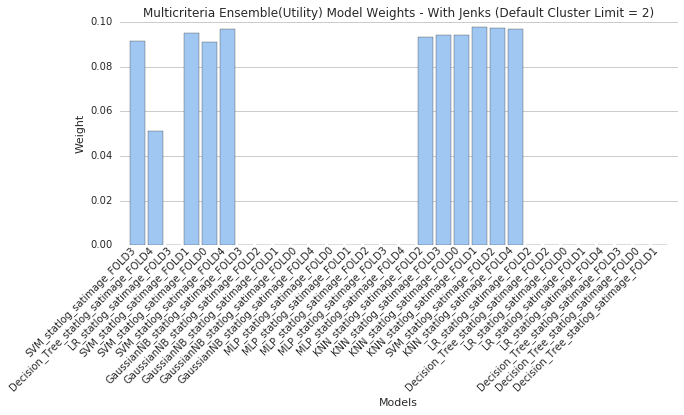

In [20]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l2.csv')
print df
me.plot_model_weights(title='Multicriteria Ensemble(Utility) Model Weights - With Jenks (Default Cluster Limit = 2)')

<h3>Multicriteria Ensemble(Utility) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Multicriteria Ensemble Normalized Gini Score: 0.976320
Number of models in the ensemble: 30

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.000762
Decision_Tree_statlog_satimage_FOLD4  0.034579
SVM_statlog_satimage_FOLD2            0.065583
KNN_statlog_satimage_FOLD2            0.062875
SVM_statlog_satimage_FOLD1            0.064237
GaussianNB_statlog_satimage_FOLD0     0.002624
GaussianNB_statlog_satimage_FOLD4     0.001816
SVM_statlog_satimage_FOLD3            0.061578
GaussianNB_statlog_satimage_FOLD2     0.001965
GaussianNB_statlog_satimage_FOLD1     0.002035
SVM_statlog_satimage_FOLD0            0.061288
SVM_statlog_satimage_FOLD4            0.065324
MLP_statlog_satimage_FOLD0            0.020449
MLP_statlog_satimage_FOLD1            0.019403
MLP_statlog_satimage_FOLD2            0.022636
MLP_statlog_satimage_FOLD3            0.023149
MLP_statlog_satimage_FOLD4            0.018428
Decision_Tree_statlog_satimage_FOLD2  0.0263

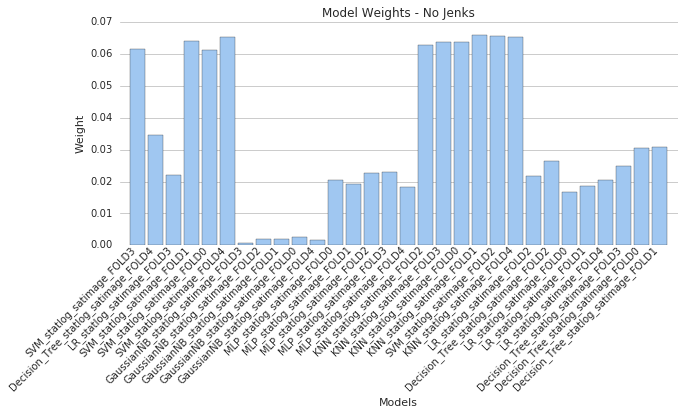

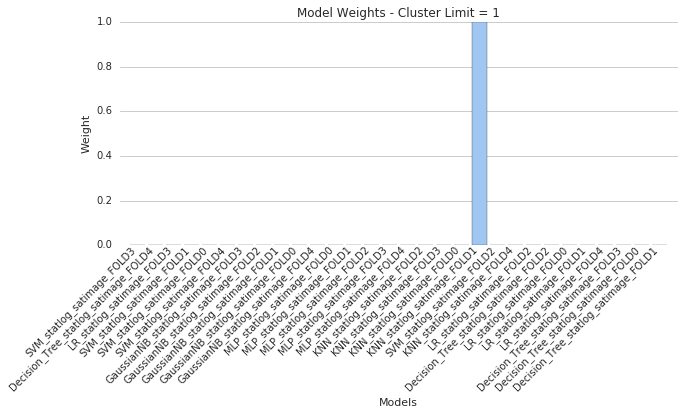

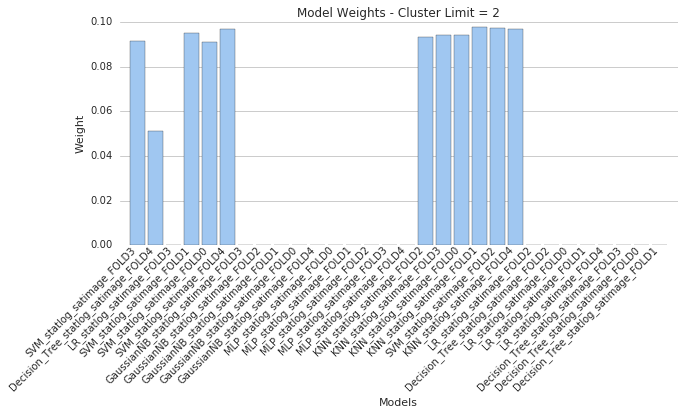

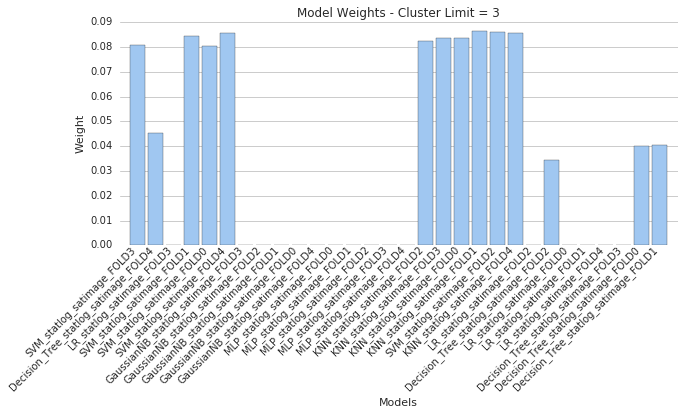

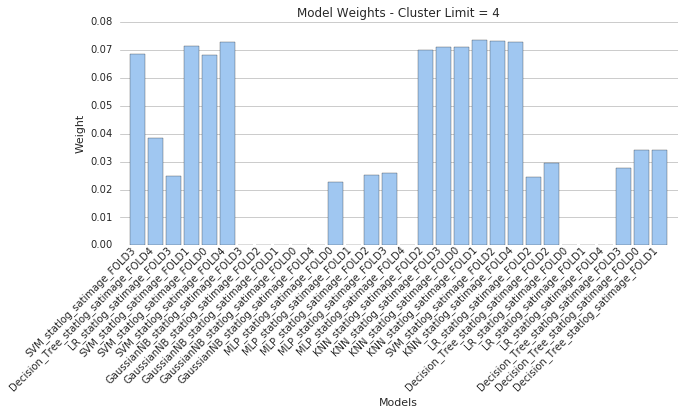

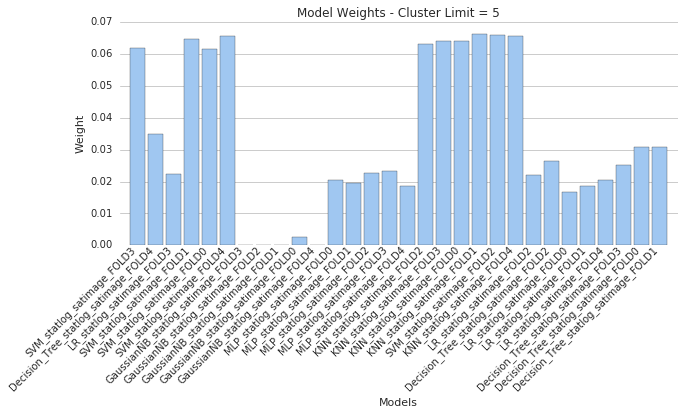

In [21]:
for i in range(0,6,1):
    me.jenks_limit = i
    me.weights = []
    me._get_clfs_weights()
    me._fit_wmv()
    model_counter = 0;
    for j in me.weights:
        if j>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Multicriteria Ensemble Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/multicriteria_ensemble_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Utility</h3>

In [22]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/multicriteria_ensemble_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.004814)"
1,"[0.004814,0.016577)"
2,"[0.016577,0.129171)"
3,"[0.129171,0.166504)"
4,"[0.166504,0.218425)"
5,"[0.218425,0.416745)"


<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set - With Jenks</h3>

In [23]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
metrics = [i if  i >= natural_breaks[-2] else 0 for i in metrics]
metrics_sum = sum(metrics)
me.weights = []
for clf in metrics:
    if  clf > 0 :
        me.weights.append(clf/metrics_sum)
    
    else:
        me.weights.append(0)
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9763132531246153

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Model Weights</h3>

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.000000
Decision_Tree_statlog_satimage_FOLD4  0.000000
SVM_statlog_satimage_FOLD2            0.091634
KNN_statlog_satimage_FOLD2            0.090681
SVM_statlog_satimage_FOLD1            0.091684
GaussianNB_statlog_satimage_FOLD0     0.000000
GaussianNB_statlog_satimage_FOLD4     0.000000
SVM_statlog_satimage_FOLD3            0.091627
GaussianNB_statlog_satimage_FOLD2     0.000000
GaussianNB_statlog_satimage_FOLD1     0.000000
SVM_statlog_satimage_FOLD0            0.091716
SVM_statlog_satimage_FOLD4            0.091709
MLP_statlog_satimage_FOLD0            0.000000
MLP_statlog_satimage_FOLD1            0.088476
MLP_statlog_satimage_FOLD2            0.000000
MLP_statlog_satimage_FOLD3            0.000000
MLP_statlog_satimage_FOLD4            0.000000
Decision_Tree_statlog_satimage_FOLD2  0.000000
KNN_statlog_satimage_FOLD3            0.090752
KNN_statlog_satimage_FOLD0            0.090590
Decision_Tree

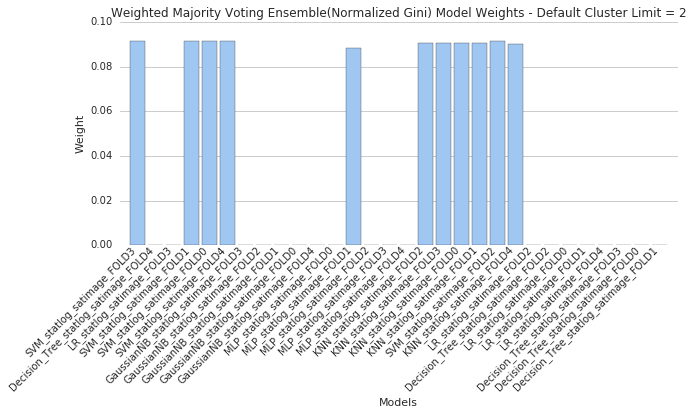

In [24]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
df.columns=['Weight']
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l.csv')
print df
me.plot_model_weights(title='Weighted Majority Voting Ensemble(Normalized Gini) Model Weights - Default Cluster Limit = 2')

<h3>Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score on Test Set,Model weights and Number of models in the ensemble - With Jenks</h3>

Cluster Limit: 0
Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: 0.971891
Number of models in the ensemble: 30

                                        Weight
GaussianNB_statlog_satimage_FOLD3     0.032771
Decision_Tree_statlog_satimage_FOLD4  0.032051
SVM_statlog_satimage_FOLD2            0.035016
KNN_statlog_satimage_FOLD2            0.034652
SVM_statlog_satimage_FOLD1            0.035035
GaussianNB_statlog_satimage_FOLD0     0.032789
GaussianNB_statlog_satimage_FOLD4     0.032755
SVM_statlog_satimage_FOLD3            0.035013
GaussianNB_statlog_satimage_FOLD2     0.032744
GaussianNB_statlog_satimage_FOLD1     0.032771
SVM_statlog_satimage_FOLD0            0.035047
SVM_statlog_satimage_FOLD4            0.035045
MLP_statlog_satimage_FOLD0            0.033707
MLP_statlog_satimage_FOLD1            0.033809
MLP_statlog_satimage_FOLD2            0.033643
MLP_statlog_satimage_FOLD3            0.033713
MLP_statlog_satimage_FOLD4            0.033675
Decision_Tree_st

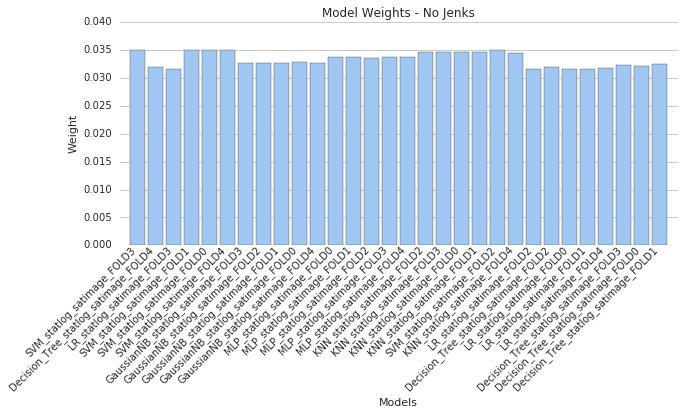

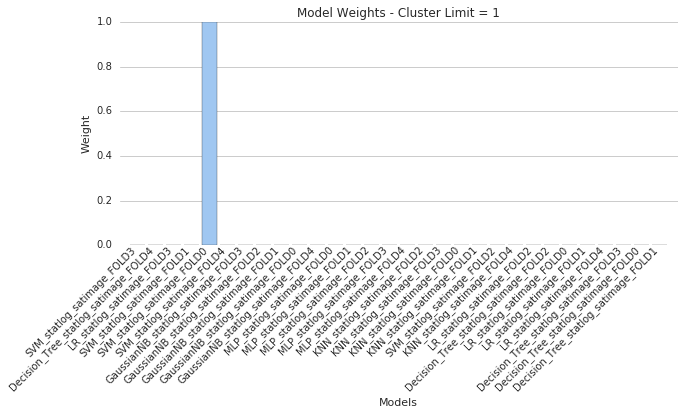

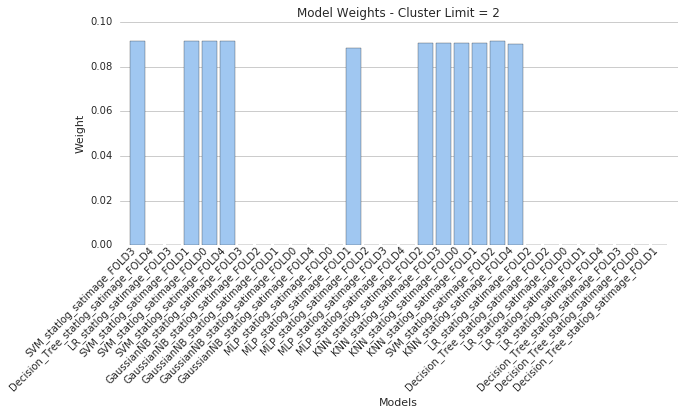

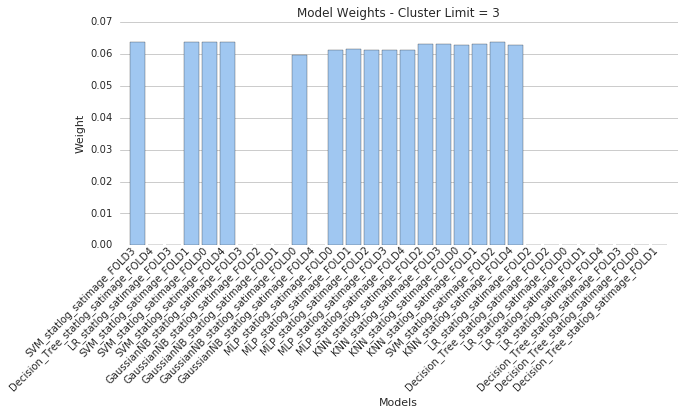

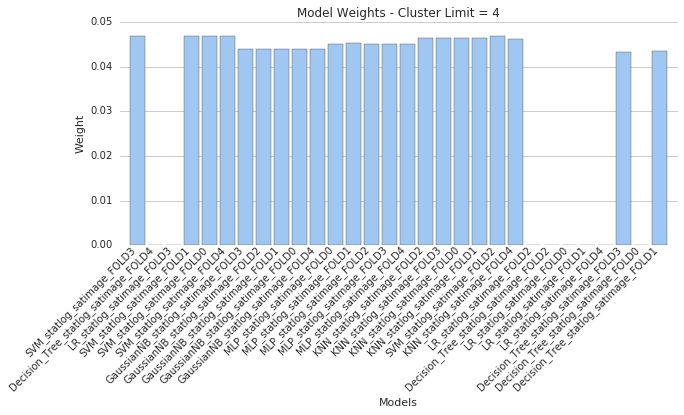

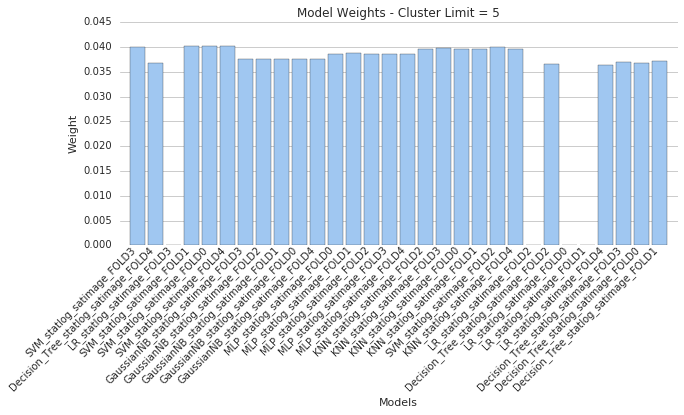

In [25]:
metrics = me._get_global_metrics(me.bootstrap_models,on='test')
m = metrics
natural_breaks = jenkspy.jenks_breaks(metrics, nb_class=5)
for i in range(0,6,1):
    metrics = m
    metrics = [j if  j >= natural_breaks[-i] else 0 for j in metrics]
    metrics_sum = sum(metrics)
    me.weights = []
    for clf in metrics:
        if  clf > 0 :
            me.weights.append(clf/metrics_sum)
        else:
            me.weights.append(0)
    me._fit_wmv()
    model_counter = 0;
    for k in me.weights:
        if k>0:
            model_counter+=1
    print 'Cluster Limit: %i'%i
    print 'Weighted Majority Voting Ensemble(Normalized Gini) Normalized Gini Score: %f'%me.score()
    print 'Number of models in the ensemble: %i\n'%model_counter
    df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.weights)),orient='index')
    df.columns=['Weight']
    df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_model_weights_with_jenks_l%i.csv'%i)
    print df
    if i == 0:
        title='Model Weights - No Jenks'
    else:
        title=str('Model Weights - Cluster Limit = %i'%i)
    me.plot_model_weights(title=title)

<h3> Jenks - Natural Breaks - Based on Normalized Gini</h3>

In [26]:
clusters = []
for i in range(0,len(me.natural_breaks)):
    if i ==0:
        clusters.append(str('[%f,%f)'%(0,me.natural_breaks[i])))
    else:
        clusters.append(str('[%f,%f)'%(me.natural_breaks[i-1],me.natural_breaks[i])))
df = pd.DataFrame(clusters,columns=['Cluster'])
df.to_csv(dataset.path+'results/wmv_ensemble_normalized_gini_jenks_natural_breaks.csv')
df

,Cluster
0,"[0.000000,0.004814)"
1,"[0.004814,0.016577)"
2,"[0.016577,0.129171)"
3,"[0.129171,0.166504)"
4,"[0.166504,0.218425)"
5,"[0.218425,0.416745)"


<h3> Weighted Majority Voting Ensemble (Equal Weights, 1/(number_of_models)) </h3>

In [27]:
me.weights = []
for clf in me.bootstrap_models:
    me.weights.append(float(1)/float(len(me.bootstrap_models)))
me.weights
me._fit_wmv()
me._get_global_metrics({'wmv':me.wmv_model},on='test')[0]

0.9716648070039091

<h3>Base Models Normalized Gini Score</h3>

In [28]:
df = pd.DataFrame.from_dict(dict(zip(me.models.keys(),me._get_global_metrics(me.models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_learners_normalized_gini_score.csv')

<h3> Base K-Fold Models Normalized Ginis Score</h3>

In [29]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me._get_global_metrics(me.bootstrap_models,on='test'))),orient='index')
df.columns = ['Normalized Gini']
df.to_csv(dataset.path+'results/base_k_fold_learners_normalized_gini_score.csv')

In [30]:
df = pd.DataFrame.from_dict(dict(zip(me.bootstrap_models.keys(),me.global_utilities)),orient='index')
df.columns=['Global Utility']
df.to_csv(dataset.path+'results/multicriteria_ensemble_predicted_global_utilities.csv')
print df

                                      Global Utility
GaussianNB_statlog_satimage_FOLD3           0.004814
Decision_Tree_statlog_satimage_FOLD4        0.218425
SVM_statlog_satimage_FOLD2                  0.414260
KNN_statlog_satimage_FOLD2                  0.397154
SVM_statlog_satimage_FOLD1                  0.405759
GaussianNB_statlog_satimage_FOLD0           0.016577
GaussianNB_statlog_satimage_FOLD4           0.011468
SVM_statlog_satimage_FOLD3                  0.388961
GaussianNB_statlog_satimage_FOLD2           0.012409
GaussianNB_statlog_satimage_FOLD1           0.012854
SVM_statlog_satimage_FOLD0                  0.387133
SVM_statlog_satimage_FOLD4                  0.412624
MLP_statlog_satimage_FOLD0                  0.129171
MLP_statlog_satimage_FOLD1                  0.122561
MLP_statlog_satimage_FOLD2                  0.142984
MLP_statlog_satimage_FOLD3                  0.146222
MLP_statlog_satimage_FOLD4                  0.116403
Decision_Tree_statlog_satimage_FOLD2        0.

In [31]:
me.multicriteria_table.sort_values('Ranking').to_csv('./statlog_me_table.csv')

In [33]:
me.utastar_model.tau_post

0.54315340910983823

In [10]:
from tools import dataset
statlog_satimage = dataset(path='./datasets/statlog_satimage/',name='statlog_satimage')
statlog_satimage.feat_class_split()
import numpy as np
statlog_satimage.y_test.value_counts()

7    470
1    461
3    397
5    237
2    224
4    211
Name: class, dtype: int64